Сгенерируем выборку $X_1 ... X_{100}$ из распределения $P_\theta$ в указанных теоретических задачах. Для уровня доверия $\alpha$ для всех $n \leq 100$ построим доверительный интервал, определенный в задаче. Изобразим их на графиках.

Для $n = 10$ и $n = 100$ оценим вероятность попадания истинного значения $\theta$ в интервал. Для этого сгенерируем достаточное количество выборок, построим по каждой из них интервалы и определим, сколько раз в интервалы попадет истинное значение $\theta$. Таким образом будет построена бернуллиевская выборка, по ней оценим вероятность.

In [11]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
%matplotlib inline

In [12]:
N = 100
alpha = 0.95

In [75]:
def solve_task(distribution, confidence_start_f, confidence_end_f):
    # Генерируем выборку.
    sample = distribution(N)
    conf_points_begins = np.zeros(N - 1)
    conf_points_ends = np.zeros(N - 1)
    for n in range(1, N):
        # Строим доверительный интервал уровня доверия alpha.
        confidence_start = confidence_start_f(sample[:n])
        confidence_end = confidence_end_f(sample[:n])
        # Добавляем его в лист.
        conf_points_begins[n-1] = confidence_start
        conf_points_ends[n-1] = confidence_end
    n = range(N - 1)
    plt.figure()
    plt.fill_between(n, conf_points_begins, conf_points_ends, where=conf_points_ends >= conf_points_begins)
    plt.title(r"Confidence interval dependiong on n")
    plt.xlabel(r'n')
    plt.ylabel(r'conf.int. length')
    plt.show()
    
    # Оценим вероятность попадания истинного значения theta в интервал для n = 10,100.
    # n = 10, 500 выборок.
    positive_10 = 0
    for i in range(500):
        cur_sample = distribution(10)
        confidence_start = confidence_start_f(cur_sample)
        confidence_end = confidence_end_f(cur_sample)
        if (confidence_start <= 1 <= confidence_end):
            positive_10 += 1
    probability_10 = positive_10 / 500.
    # n = 100, 100 выборок.
    positive_100 = 0
    for i in range(100):
        cur_sample = distribution(100)
        confidence_start = confidence_start_f(cur_sample)
        confidence_end = confidence_end_f(cur_sample)
        if (confidence_start <= 1 <= confidence_end):
            positive_100 += 1
    probability_100 = positive_100 / 100.
    
    print("Вероятность попадания истинного значения theta (для n=",10,")=", probability_10)
    print("Вероятность попадания истинного значения theta (для n=",100,")=", probability_100)

### Равномерное распределение.

### Доверительный интервал: $(\frac{\bar{X}}{ \frac{1}{2} + E }, \frac{\bar{X}}{ \frac{1}{2} - E })$, где $E = \sqrt{ \frac{1}{12\alpha n} }$ 

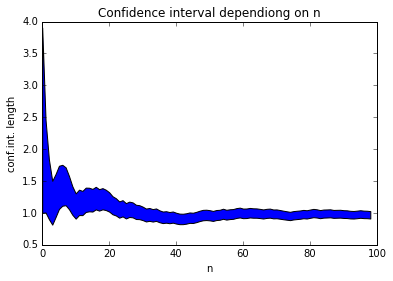

Вероятность попадания истинного значения theta (для n= 10 )= 0.678
Вероятность попадания истинного значения theta (для n= 100 )= 0.67


In [76]:
solve_task(distribution = (lambda N: stats.uniform.rvs(size = N)), 
           confidence_start_f=(lambda sample: np.mean(sample) / (1./2 + np.sqrt(1 / (12 * alpha * len(sample)))) ),
          confidence_end_f=(lambda sample: np.mean(sample) / (1./2 - np.sqrt(1 / (12 * alpha * len(sample)))) ) )

### Доверительный интервал: $(X_{(1)}, \frac{X_{(1)}}{1 - (\alpha)^{\frac{1}{n}}})$

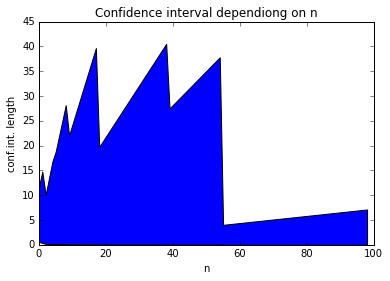

Вероятность попадания истинного значения theta (для n= 10 )= 0.974
Вероятность попадания истинного значения theta (для n= 100 )= 0.99


In [77]:
solve_task(distribution = (lambda N: stats.uniform.rvs(size = N)), 
           confidence_start_f=(lambda sample: np.min(sample)),
          confidence_end_f=(lambda sample: np.min(sample) / (1 - np.power(0.95, 1. / len(sample))) ) )

### Доверительный интервал: $(X_{(n)}, \frac{X_{(n)} } {(1 - \alpha)^{\frac{1}{n}}} )$

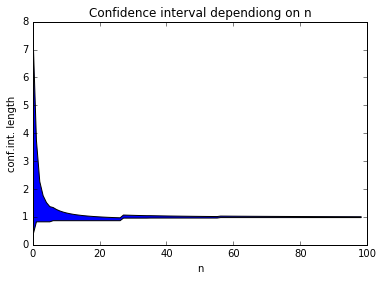

Вероятность попадания истинного значения theta (для n= 10 )= 0.952
Вероятность попадания истинного значения theta (для n= 100 )= 0.97


In [78]:
solve_task(distribution = (lambda N: stats.uniform.rvs(size = N)), 
           confidence_start_f=(lambda sample: np.max(sample)),
          confidence_end_f=(lambda sample: np.max(sample) / (np.power(0.05, 1. / len(sample))) ) )

По этим графикам и вероятностям, видно, что последний доверительный интервал лучше двух предыдущих.(Точнее оценивает параметр $\theta$). А первый доверительный интервал, показывает уровень доверия ниже ожидаемого.

### Распределение Коши со сдвигом. 

### Доверительный интервал $(\hat{\mu} - u_{\frac{1 + \alpha}{2}} \frac{\pi}{2\sqrt{n}}, \hat{\mu} + u_{\frac{1 + \alpha}{2}} \frac{\pi}{2\sqrt{n}})$, квантиль смотрим в таблице.

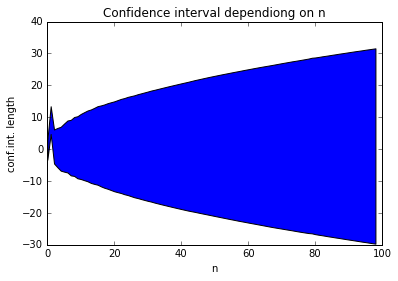

Вероятность попадания истинного значения theta (для n= 10 )= 1.0
Вероятность попадания истинного значения theta (для n= 100 )= 1.0


In [84]:
solve_task(distribution = (lambda N: stats.cauchy.rvs(size = N, loc = 1.)), 
           confidence_start_f=(lambda sample: np.median(sample) - stats.norm.ppf((1 + alpha) / 2) * 
                               np.pi / 2 * np.sqrt(len(sample))),
          confidence_end_f=(lambda sample: np.median(sample) + stats.norm.ppf((1 + alpha) / 2) * 
                               np.pi / 2 * np.sqrt(len(sample))) )

### Пуассоновское распределение.

### Доверительный интервал: $(\bar{X}(1 - \frac{u_{\frac{1 + \alpha}{2}}}{\sqrt{n}}), \bar{X}(1 + \frac{u_{\frac{1 + \alpha}{2}}}{\sqrt{n}}))$.

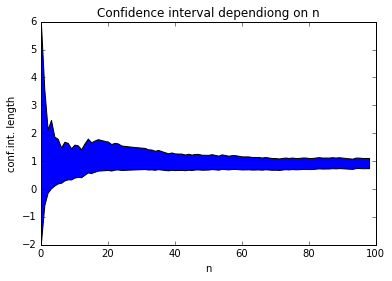

Вероятность попадания истинного значения theta (для n= 10 )= 0.854
Вероятность попадания истинного значения theta (для n= 100 )= 0.96


In [86]:
solve_task(distribution = (lambda N: stats.poisson.rvs(1., size = N)), 
           confidence_start_f=(lambda sample: np.mean(sample) * (1 - stats.norm.ppf((1 + alpha) / 2) / np.sqrt(len(sample))) ),
          confidence_end_f=(lambda sample: np.mean(sample) * (1 + stats.norm.ppf((1 + alpha) / 2) / np.sqrt(len(sample))) ))

### Гамма распределение. $(\theta,\lambda) = (10,1)$


### Доверительный интервал: $(\frac{\lambda}{\bar{X}} -  u_{\frac{1 + \alpha}{2}} (\frac{\lambda}{\bar{X}})^3 \frac{1}{\sqrt{n}}, \frac{\lambda}{\bar{X}} +  u_{\frac{1 + \alpha}{2}} (\frac{\lambda}{\bar{X}})^3 \frac{1}{\sqrt{n}} )$

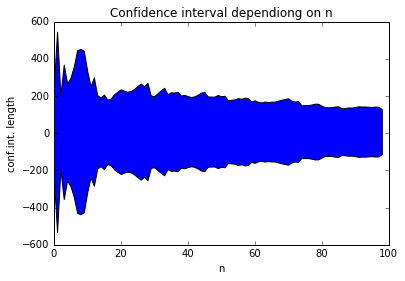

Вероятность попадания истинного значения theta (для n= 10 )= 1.0
Вероятность попадания истинного значения theta (для n= 100 )= 1.0


In [87]:
# lambda = alpha = 1, theta = 1 = 1 / scale
# В библиотеке распределение определено так: gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
solve_task(distribution = (lambda N: stats.gamma.rvs(a = 1., scale = 1./10, size = N)), 
           confidence_start_f=(lambda sample: 1 / np.mean(sample) - stats.norm.ppf((1 + alpha) / 2) / np.sqrt(len(sample)) * 
                              np.power((1 / np.mean(sample)),3) ),
          confidence_end_f=(lambda sample: 1 / np.mean(sample) + stats.norm.ppf((1 + alpha) / 2) / np.sqrt(len(sample)) * 
                              np.power((1 / np.mean(sample)),3) ))

### Вывод. Мы построили доверительные интервалы, для указанных распределений. Среди доверительных интервалов у равномерного, самым точно ограничивающим $\theta$ оказался интервал  $(X_{(n)}, \frac{X_{(n)} } {(1 - \alpha)^{\frac{1}{n}}} )$. Мы увидели, что доверительные интервалы, в зависимости от размера выборки, могут как сходиться по ширине, так и расходиться.(Соответственно сильнее или слабее ограничивать параметры). В целом, все интервалы, действительно предсказывают попадание параметра в них с вероятностью больше 0.95, за исключением первого в равномерном.